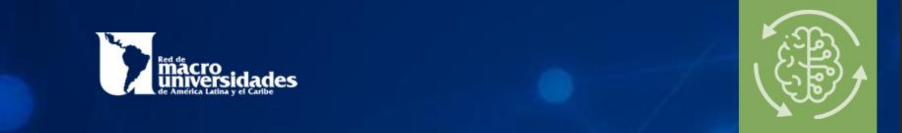


---
<center>

💻 **INTELIGENCIA ARTIFICIAL - LIDeSIA -FCEFyN - UNC**

</center>


---

Autor:.

Directora:    Dra. Inga. Laura Diaz Dávila.
###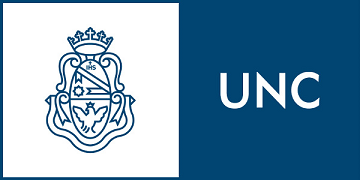

In [ ]:
!pip install extra-keras-datasets
#https://arxiv.org/pdf/1702.05373.pdf

In [ ]:
import tensorflow.keras
from extra_keras_datasets import emnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import keras

In [ ]:
# Load EMNIST dataset
(train_inputs, train_target), (test_inputs, test_target) = emnist.load_data()

INFO:root:Loading dataset = emnist


In [ ]:
#fashion_mnist = keras.datasets.fashion_mnist
#(train_inputs, train_target), (test_inputs, test_target) = fashion_mnist.load_data()

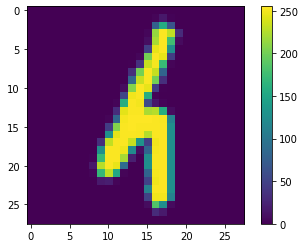

42


In [ ]:
plt.figure()
plt.imshow(train_inputs[5])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_target[5])

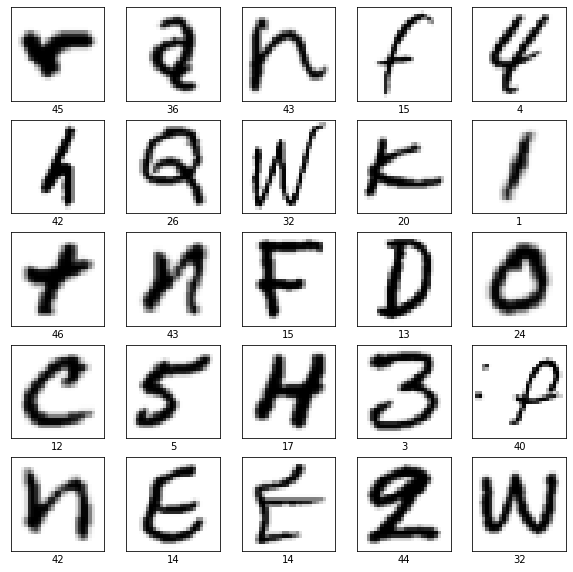

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(train_target[i])
plt.show()

In [ ]:
# Model configuration
img_width, img_height, num_channels = 28, 28, 1
input_shape = (img_height, img_width, num_channels)
batch_size = 250
no_epochs = 25
no_classes = 47
validation_split = 0.2
verbosity = 1

In [ ]:
# Add number of channels to EMNIST data
train_inputs = train_inputs.reshape((len(train_inputs), img_height, img_width, num_channels))
test_inputs  = test_inputs.reshape((len(test_inputs), img_height, img_width, num_channels))

In [ ]:
test_inputs.shape

(18800, 28, 28, 1)

In [ ]:
# Parse numbers as floats
train_inputs = train_inputs.astype('float32')
test_inputs = test_inputs.astype('float32')

In [ ]:
# Normalize data
train_inputs  = train_inputs  / 255
test_inputs = test_inputs / 255

In [ ]:
# Convert target vectors to categorical targets
train_target = tensorflow.keras.utils.to_categorical(train_target, no_classes)
test_target = tensorflow.keras.utils.to_categorical(test_target, no_classes)

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [ ]:
# Fit data to model
history = model.fit(train_inputs, train_target,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/25
361/361 [==============================] - 62s 170ms/step - loss: 1.7605 - accuracy: 0.5173 - val_loss: 0.5579 - val_accuracy: 0.8163
Epoch 2/25
361/361 [==============================] - 61s 168ms/step - loss: 0.5768 - accuracy: 0.8115 - val_loss: 0.4539 - val_accuracy: 0.8462
Epoch 3/25
361/361 [==============================] - 61s 168ms/step - loss: 0.4654 - accuracy: 0.8430 - val_loss: 0.4066 - val_accuracy: 0.8602
Epoch 4/25
361/361 [==============================] - 60s 167ms/step - loss: 0.4180 - accuracy: 0.8588 - val_loss: 0.3890 - val_accuracy: 0.8623
Epoch 5/25
361/361 [==============================] - 61s 168ms/step - loss: 0.3781 - accuracy: 0.8673 - val_loss: 0.3739 - val_accuracy: 0.8685
Epoch 6/25
361/361 [==============================] - 61s 168ms/step - loss: 0.3527 - accuracy: 0.8736 - val_loss: 0.3633 - val_accuracy: 0.8688
Epoch 7/25
361/361 [==============================] - 60s 168ms/step - loss: 0.3325 - accuracy: 0.8798 - val_loss: 0.3583 - val_ac

In [ ]:
# Generate generalization metrics
score = model.evaluate(test_inputs, test_target, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.39519625902175903 / Test accuracy: 0.8746276497840881


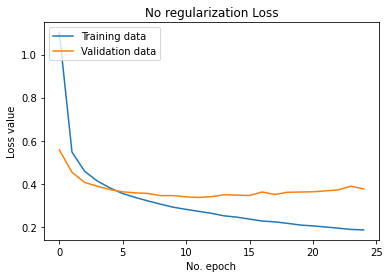

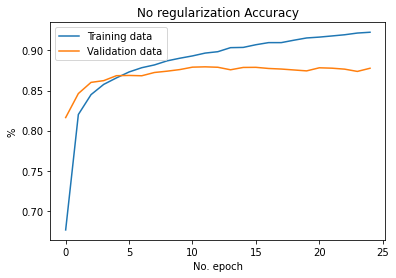

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('No regularization Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('No regularization Accuracy')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', activity_regularizer=regularizers.l2(0.01)))
model.add(Dense(no_classes, activation='softmax', activity_regularizer=regularizers.l2(0.01)))

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(train_inputs, train_target,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/25
361/361 [==============================] - 69s 190ms/step - loss: 2.8901 - accuracy: 0.4778 - val_loss: 0.9831 - val_accuracy: 0.8163
Epoch 2/25
361/361 [==============================] - 68s 189ms/step - loss: 0.9338 - accuracy: 0.8259 - val_loss: 0.7241 - val_accuracy: 0.8488
Epoch 3/25
361/361 [==============================] - 68s 189ms/step - loss: 0.7283 - accuracy: 0.8500 - val_loss: 0.6193 - val_accuracy: 0.8596
Epoch 4/25
361/361 [==============================] - 68s 189ms/step - loss: 0.6268 - accuracy: 0.8616 - val_loss: 0.5555 - val_accuracy: 0.8664
Epoch 5/25
361/361 [==============================] - 68s 189ms/step - loss: 0.5623 - accuracy: 0.8715 - val_loss: 0.5206 - val_accuracy: 0.8719
Epoch 6/25
361/361 [==============================] - 68s 189ms/step - loss: 0.5213 - accuracy: 0.8779 - val_loss: 0.4936 - val_accuracy: 0.8732
Epoch 7/25
361/361 [==============================] - 68s 189ms/step - loss: 0.4873 - accuracy: 0.8828 - val_loss: 0.4644 - val_ac

In [ ]:
# Generate generalization metrics
score = model.evaluate(test_inputs, test_target, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.37350013852119446 / Test accuracy: 0.88941490650177


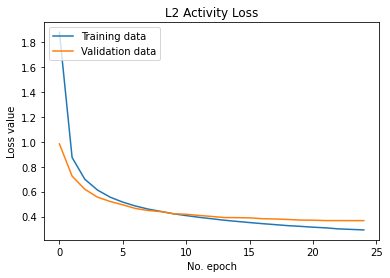

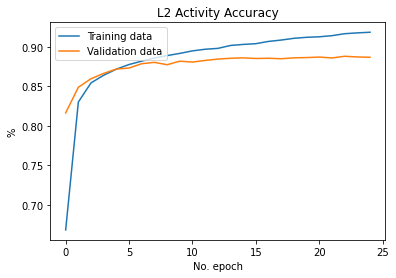

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('L2 Activity Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('L2 Activity Accuracy')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dense(no_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(train_inputs, train_target,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/25
361/361 [==============================] - 62s 170ms/step - loss: 33.0658 - accuracy: 0.0204 - val_loss: 4.3898 - val_accuracy: 0.0213
Epoch 2/25
361/361 [==============================] - 61s 169ms/step - loss: 4.3920 - accuracy: 0.0207 - val_loss: 4.3918 - val_accuracy: 0.0212
Epoch 3/25
361/361 [==============================] - 61s 170ms/step - loss: 4.3919 - accuracy: 0.0220 - val_loss: 4.3906 - val_accuracy: 0.0205
Epoch 4/25
361/361 [==============================] - 61s 170ms/step - loss: 4.3917 - accuracy: 0.0223 - val_loss: 4.3928 - val_accuracy: 0.0209
Epoch 5/25
361/361 [==============================] - 61s 169ms/step - loss: 4.3918 - accuracy: 0.0205 - val_loss: 4.3920 - val_accuracy: 0.0221
Epoch 6/25
361/361 [==============================] - 61s 170ms/step - loss: 4.3919 - accuracy: 0.0219 - val_loss: 4.3964 - val_accuracy: 0.0217
Epoch 7/25
361/361 [==============================] - 61s 169ms/step - loss: 4.3918 - accuracy: 0.0202 - val_loss: 4.3955 - val_a

In [ ]:
# Generate generalization metrics
score = model.evaluate(test_inputs, test_target, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 4.392431735992432 / Test accuracy: 0.021276595070958138


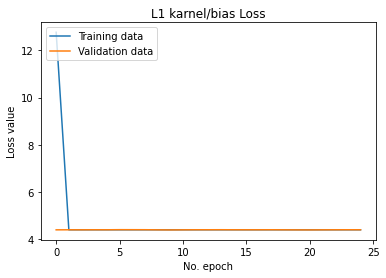

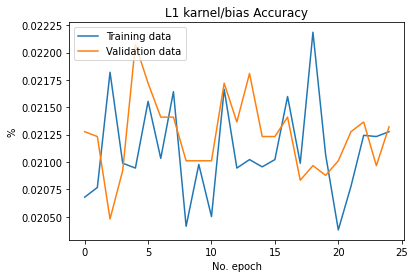

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('L1 karnel/bias Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('L1 karnel/bias Accuracy')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(no_classes, activation='softmax', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_inputs, train_target,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/25
361/361 [==============================] - 80s 220ms/step - loss: 4.9907 - accuracy: 0.0232 - val_loss: 3.8617 - val_accuracy: 0.0205
Epoch 2/25
361/361 [==============================] - 78s 215ms/step - loss: 3.8613 - accuracy: 0.0207 - val_loss: 3.8608 - val_accuracy: 0.0205
Epoch 3/25
361/361 [==============================] - 78s 216ms/step - loss: 3.8607 - accuracy: 0.0202 - val_loss: 3.8606 - val_accuracy: 0.0209
Epoch 4/25
361/361 [==============================] - 78s 216ms/step - loss: 3.8606 - accuracy: 0.0210 - val_loss: 3.8605 - val_accuracy: 0.0205
Epoch 5/25
361/361 [==============================] - 78s 216ms/step - loss: 3.8605 - accuracy: 0.0210 - val_loss: 3.8605 - val_accuracy: 0.0205
Epoch 6/25
361/361 [==============================] - 78s 216ms/step - loss: 3.8605 - accuracy: 0.0213 - val_loss: 3.8605 - val_accuracy: 0.0204
Epoch 7/25
361/361 [==============================] - 78s 216ms/step - loss: 3.8605 - accuracy: 0.0215 - val_loss: 3.8605 - val_ac

In [ ]:
# Generate generalization metrics
score = model.evaluate(test_inputs, test_target, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.860377788543701 / Test accuracy: 0.021276595070958138


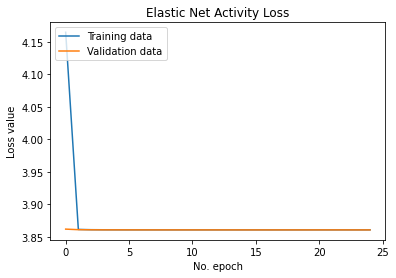

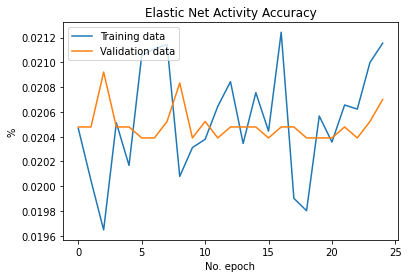

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('Elastic Net Activity Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('Elastic Net Activity Accuracy')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()